In [ ]:
from google.colab import files
import pandas as pd
import glob
import os


print("Select all CSV files to upload")
uploaded= files.upload()
print("\n Uploaded Files")
for filename in uploaded.keys():
  print(f"🔹{filename}")
path = "/content/"
print("\n Files in Colab Directory after Upload:")
print(os.listdir(path))

Select all CSV files to upload


Saving city aquarium_.csv to city aquarium_.csv
Saving city botanic Garden_.csv to city botanic Garden_.csv
Saving city museum_.csv to city museum_.csv
Saving city zoo_.csv to city zoo_.csv
Saving cruise trip_.csv to cruise trip_.csv
Saving sky tower_.csv to sky tower_.csv

 Uploaded Files
🔹city aquarium_.csv
🔹city botanic Garden_.csv
🔹city museum_.csv
🔹city zoo_.csv
🔹cruise trip_.csv
🔹sky tower_.csv

 Files in Colab Directory after Upload:
['.config', 'city botanic Garden_.csv', 'city zoo_.csv', 'cruise trip_.csv', 'sky tower_.csv', 'city aquarium_.csv', 'city museum_.csv', 'sample_data']


In [ ]:
csv_files = glob.glob(path + "/*.csv")

df_list = []
for file in csv_files:
    df = pd.read_csv(file, low_memory=False)
    df_list.append(df)

merged_df = pd.concat(df_list,axis=0, ignore_index=True)

merged_df.to_csv(path + '/merged_file.csv', index=False)

print(f"\n Successfully merged {len(csv_files)} CSV files into one dataset (row-wise)!")
print(f"🔹 Total Rows: {merged_df.shape[0]}, Total Columns: {merged_df.shape[1]}")

merged_df.head()



 Successfully merged 6 CSV files into one dataset (row-wise)!
🔹 Total Rows: 2557, Total Columns: 2


,label,text
0,1,NaN
1,1,A visit to the City Botanic Garden made my da...
2,1,NaN
3,1,Visiting the botanic garden last weekend was ...
4,1,"Absolutely, it was a delightful afternoon at ..."


In [ ]:
import chardet

with open("/content/merged_file.csv", "rb") as f:
    raw_data = f.read(100000000000)  # Read first 10,000 bytes for detection
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']
    print(f"\n🔍 Detected Encoding: {detected_encoding}")


🔍 Detected Encoding: utf-8


In [ ]:
if detected_encoding.lower() != "utf-8":
   print("\n Encoding is not UTF-8. Converting to UTF-8")
   merged_df = pd.read_csv("/content/merged_dataset.csv", encoding=detected_encoding, low_memory= False)
   merged_df.to_csv("/content/merged_dataset.csv", index=False, encoding="utf-8")
   print("Encoding coversion completed")

else :
  print("\n Encoding is already UTF-8")


 Encoding is already UTF-8



 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2557 non-null   int64 
 1   text    1413 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.1+ KB
None

 Missing Values in Each Column:
label       0
text     1144
dtype: int64


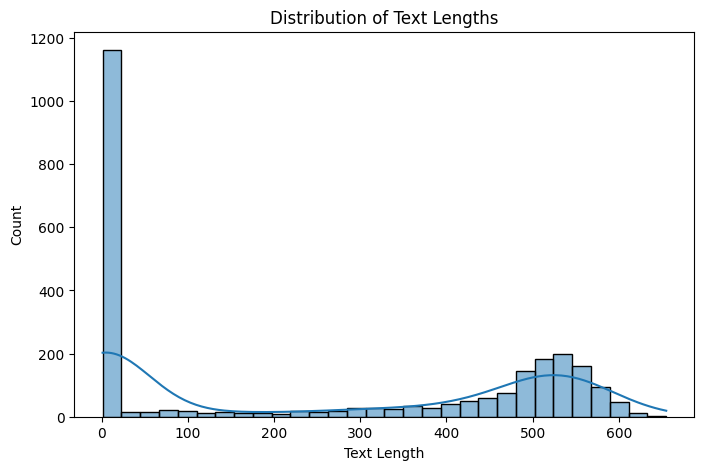

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


print("\n Dataset Overview:")
print(merged_df.info())

print("\n Missing Values in Each Column:")
print(merged_df.isnull().sum())


if 'text' in merged_df.columns:
   text_length = merged_df['text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(8,5))
sns.histplot(text_length, bins=30, kde=True)  # Plot text length distribution
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.show()

In [ ]:
df_cleaned = merged_df.dropna(subset=['text'])
print("Data Types of Cleaned Dataset:")
print(df_cleaned.dtypes)
print(f"\n✅ Removed missing text values. Remaining rows and columns: {df_cleaned.shape}")
df_cleaned.to_csv("/content/cleaned_dataset.csv", index=False)
print("\n Missing Values after removal:")
print(df_cleaned.isnull().sum())

label_counts = df_cleaned['label'].value_counts()

print("\n Label Distribution:")
print(label_counts)


Data Types of Cleaned Dataset:
label     int64
text     object
dtype: object

✅ Removed missing text values. Remaining rows and columns: (1413, 2)

 Missing Values after removal:
label    0
text     0
dtype: int64

 Label Distribution:
label
1    848
0    565
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_cleaned, test_size=0.3, stratify=df_cleaned['label'], random_state=36312401)

print(f"Train Dataset Shape: {train_df.shape}")
print(f"Test Dataset Shape: {test_df.shape}")

train_df.to_csv("/content/train_dataset.csv", index=False)
test_df.to_csv("/content/test_dataset.csv", index=False)


Train Dataset Shape: (989, 2)
Test Dataset Shape: (424, 2)


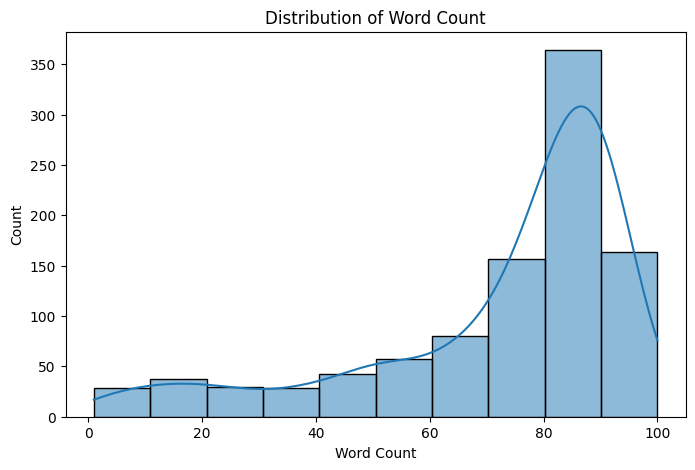

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
word_count= train_df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(word_count, bins=10, kde=True)  # Plot text length distribution
plt.title("Distribution of Word Count")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.show()

In [ ]:
print(word_count.describe())

count    989.000000
mean      72.209302
std       23.615889
min        1.000000
25%       65.000000
50%       82.000000
75%       88.000000
max      100.000000
Name: text, dtype: float64


In [ ]:
short_text=train_df[train_df['text'].apply(lambda x: len(str(x).split())<=5)]
print(short_text['text'])

884                                  Disappointing food
430                                             A visit
712                                               Once!
82                                                Sure.
409                                 The zoo was filthy,
1412                                                  I
958                                            Onboard.
2437                                        This is it.
1368                                    I have a phobia
1668                         I will definitely go back.
1052    One passenger experienced relentless harassment
1499                                        Absolutely!
1816                 Longest length allowed: 500 words.
1642                                             At the
580                                                   "
121                                                   "
Name: text, dtype: object


In [ ]:
short_texts_to_remove = [
    "",
    "I",
    "A visit",
    "At the",
    "At the zoo",
    "Once!",
    '"',
]

train_df=train_df[~train_df['text'].isin(short_texts_to_remove)]
print(f"Shape of data set after removing unwanted short texts: {train_df.shape}")
train_df.to_csv("/content/train_dataset.csv", index=False)
test_df.to_csv("/content/test_dataset.csv", index=False)
print("✅ Merged dataset saved successfully!")
files.download("/content/train_dataset.csv")
files.download("/content/test_dataset.csv")


Shape of data set after removing unwanted short texts: (985, 2)
✅ Merged dataset saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install symspellpy

from symspellpy import SymSpell, Verbosity
import pkg_resources

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)

sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 10.8 MB/s eta 0:00:00


True

In [ ]:
def correct_spelling(text):
 if isinstance(text, str):
   suggestions = sym_spell.lookup(text, Verbosity.CLOSEST, max_edit_distance=2)
   return suggestions[0].term if suggestions else text
 return text


In [ ]:
test_df, = train_test_split(df_cleaned, test_size=0.3, stratify=df_cleaned['label'], random_state=36312401)

In [ ]:
train_df["text"] = train_df["text"].apply(correct_spelling)
test_df["text"] = test_df["text"].apply(correct_spelling)

In [ ]:
train_df.to_csv("/content/train_cleaned.csv", index=False)
test_df.to_csv("/content/test_cleaned.csv", index=False)

print(" SymSpell spelling correction applied. Cleaned datasets saved.")

 SymSpell spelling correction applied. Cleaned datasets saved.


In [ ]:
!pip install nltk

import nltk
from nltk.corpus import wordnet
import random
import re


nltk.download("wordnet")
nltk.download("omw-1.4")

RANDOM_SEED = 36312401
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def synonym_replacement(text, n=2):
    if not isinstance(text, str) or len(text.split()) < 2:
        return text  # ✅ Return original text if it's empty or too short

    words = text.split()
    new_words = words.copy()  # ✅ Fix: Now using 'words' instead of 'word'

    # Get a random set of words to replace (Ensuring Reproducibility)
    random.seed(RANDOM_SEED)
    words_to_replace = random.sample(words, min(n, len(words)))

    for word in words_to_replace:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name().replace("_", " ")  # ✅ Ensure synonyms are formatted properly
            new_words = [synonym if w == word else w for w in new_words]

    return " ".join(new_words)

# Apply Synonym Replacement to 70% of the dataset
synonym_replaced_texts = train_df.sample(frac=0.70, random_state=RANDOM_SEED)["text"].apply(synonym_replacement)

# Ensure all transformed text is stored properly
print(f"✅ Successfully generated {len(synonym_replaced_texts)} augmented samples.")


✅ Successfully generated 690 augmented samples.


In [ ]:
synonym_replaced_df = pd.DataFrame({"label": train_df.loc[synonym_replaced_texts.index, "label"].values,
    "text": synonym_replaced_texts.values,  # Augmented text
      # Correct labels from original dataset
})

print(f"{synonym_replaced_df.shape}")
synonym_replaced_df.head()

(690, 2)


,label,text
0,0,"Despite the Sky Tower's popularity, my experie..."
1,0,My child was really look forward to visiting t...
2,1,"""At my local city zoo, I thoroughly enjoyed wa..."
3,0,"""During the second night of our cruise, my wif..."
4,0,"I booked a cruise trip to Cancun, Mexico, with..."


In [ ]:
print(train_df.shape)
train_df.head()


(985, 2)


,label,text
537,0,"On a previous visit to the city zoo, I was di..."
894,0,This boat rocked more violently than I expect...
1136,1,The Sky Tower experience is incredible. On a ...
1230,1,"The Sky Tower in Auckland, New Zealand, offer..."
754,1,I loved the sunset dinner cruise I took last ...


In [ ]:
final_train_df=pd.concat([train_df, synonym_replaced_df], ignore_index=True).drop_duplicates()
print(f"✅ Merged dataset size: {final_train_df.shape}")


✅ Merged dataset size: (1654, 2)


In [ ]:
final_train_df.to_csv("/content/final_train_dataset.csv", index=False)

print("✅ Merged dataset saved successfully!")
files.download("/content/final_train_dataset.csv")

✅ Merged dataset saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import data_table
data_table.DataTable(final_train_df)

,label,text
0,0,"On a previous visit to the city zoo, I was di..."
1,0,This boat rocked more violently than I expect...
2,1,The Sky Tower experience is incredible. On a ...
3,1,"The Sky Tower in Auckland, New Zealand, offer..."
4,1,I loved the sunset dinner cruise I took last ...
...,...,...
1670,1,The Sky Tower offers angstrom breathtaking pan...
1671,0,I once visited a city aquarium on a hot summer...
1672,1,I first took a cruise vacation on my 30th wedd...
1673,1,During our Norwegian Cruise line trip from Mia...


In [ ]:
X_train = final_train_df["text"]
y_train = final_train_df["label"]

X_test = test_df["text"]
y_test = test_df["label"]

print(f"✅ Training Set: {X_train.shape[0]} samples")
print(f"✅ Test Set: {X_test.shape[0]} samples")

✅ Training Set: 1654 samples
✅ Test Set: 424 samples


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Keep only the top 5000 most important words
    stop_words="english",  # Remove common stop words
    ngram_range=(1,2)  # Consider both single words and bigrams
)

# Fit TF-IDF on the training data and transform all sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print TF-IDF matrix shapes
print(f"✅ TF-IDF Training Set Shape: {X_train_tfidf.shape}")
print(f"✅ TF-IDF Test Set Shape: {X_test_tfidf.shape}")

✅ TF-IDF Training Set Shape: (1654, 5000)
✅ TF-IDF Test Set Shape: (424, 5000)


Model

In [ ]:
!pip install scikit-learn

# Import necessary libraries
from sklearn.experimental import enable_halving_search_cv  # Enables HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

xgb_model = XGBClassifier(
    tree_method="gpu_hist",  # Enable GPU acceleration
    predictor="gpu_predictor",  # Use GPU for predictions
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=36312401
)
param_grid = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 6],
    "subsample": [1.0],
    "colsample_bytree": [0.8],
    "gamma": [0, 0.1],
    "min_child_weight": [1, 3],
    "reg_lambda": [0.1, 1],
    "reg_alpha": [0.1, 1]
}

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # Required
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

halving_grid_search = HalvingGridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1,
    factor=2,
    min_resources="exhaust",
    refit=True
)

halving_grid_search.fit(X_train_tfidf, y_train)

print(f"✅ Best Parameters: {halving_grid_search.best_params_}")
print(f"🎯 Best Accuracy Score: {halving_grid_search.best_score_:.4f}")


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 206
max_resources_: 1654
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 8
n_resources: 206
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 1
n_candidates: 4
n_resources: 412
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 2
n_candidates: 2
n_resources: 824
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 3
n_candidates: 1
n_resources: 1648
Fitting 3 folds for each of 1 candidates, totalling 3 fits
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
🎯 Best Accuracy Score: 0.9769


In [ ]:
best_xgb = halving_grid_search.best_estimator_

# Train on the full training set
best_xgb.fit(X_train_tfidf, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb, "/content/xgboost_best_model.pkl")

print("✅ Model saved successfully as 'xgboost_best_model.pkl'!")

from google.colab import files

# Download the saved model
files.download("/content/xgboost_best_model.pkl")

✅ Model saved successfully as 'xgboost_best_model.pkl'!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Predictions on Training & Dev Set
y_train_pred = best_xgb.predict(X_train_tfidf)

# Print Accuracy
print(f"✅ Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

# Print Classification Reports
print("\n📌 Training Set Performance:")
print(classification_report(y_train, y_train_pred))


✅ Training Accuracy: 0.9921

📌 Training Set Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       660
           1       1.00      0.99      0.99       994

    accuracy                           0.99      1654
   macro avg       0.99      0.99      0.99      1654
weighted avg       0.99      0.99      0.99      1654



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_train_pred = best_xgb.predict(X_train_tfidf)


# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print accuracy
print(f"✅ Training Accuracy: {train_accuracy:.4f}")


✅ Training Accuracy: 0.9921


In [ ]:
y_test_pred = best_xgb.predict(X_test_tfidf)

# Calculate test accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

✅ Test Accuracy: 0.9528


In [ ]:
from sklearn.metrics import classification_report

# Print classification report for test set
print("\n🔹 Test Set Performance:")
print(classification_report(y_test, y_test_pred))


🔹 Test Set Performance:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       170
           1       0.96      0.96      0.96       254

    accuracy                           0.95       424
   macro avg       0.95      0.95      0.95       424
weighted avg       0.95      0.95      0.95       424



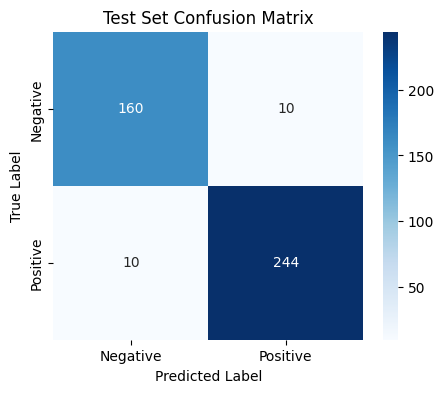

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot Confusion Matrix for Test Set
plot_confusion_matrix(y_test, y_test_pred, "Test Set Confusion Matrix")

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

# ROC AUC
proba = best_xgb.predict_proba(X_test_tfidf)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, proba))

# PR AUC
print("PR AUC Score:", average_precision_score(y_test, proba))

ROC AUC Score: 0.9924038906901343
PR AUC Score: 0.9951539898165183


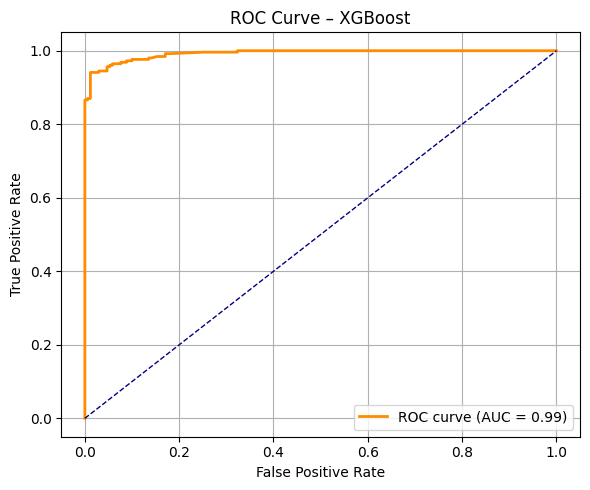

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for class 1
y_score = best_xgb.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

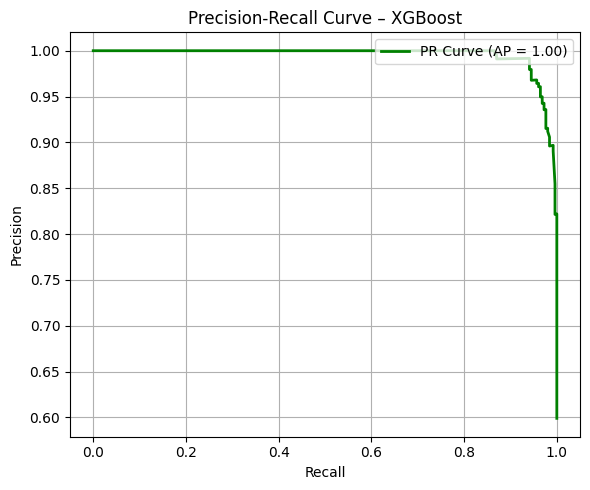

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green', lw=2, label='PR Curve (AP = {:.2f})'.format(average_precision_score(y_test, y_score)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve – XGBoost')
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()